# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline
%config IPCompleter.greedy=True

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [2]:
df = pd.read_csv("transfusion.data")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [3]:
df.columns = ['Recency', 'Frequency', 'Volume', 'Time', 'Target']
df.head()

,Recency,Frequency,Volume,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

balance 0 :  0.7620320855614974
balance 1 :  0.23796791443850268


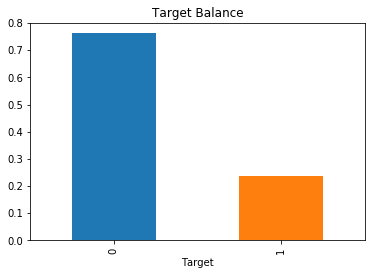

In [4]:
print('balance 0 : ', sum(df["Target"]==0)/df.shape[0])
print('balance 1 : ', sum(df["Target"]==1)/df.shape[0])
(df.groupby('Target').size()/df.shape[0]).plot(kind="bar", title="Target Balance")

In [5]:
print("We can have an accuracy of : ",sum(df["Target"]==0)/df.shape[0])

We can have an accuracy of :  0.7620320855614974


3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

In [6]:
df.corr()

,Recency,Frequency,Volume,Time,Target
Recency,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency,-0.182745,1.000000,1.000000,0.634940,0.218633
Volume,-0.182745,1.000000,1.000000,0.634940,0.218633
Time,0.160618,0.634940,0.634940,1.000000,-0.035854
Target,-0.279869,0.218633,0.218633,-0.035854,1.000000


3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

the 2 most correlated variables are Frequency and volume


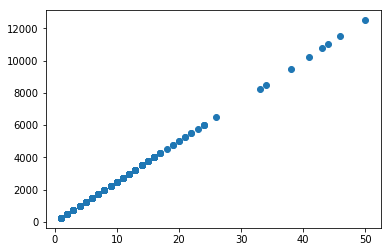

In [7]:
print('the 2 most correlated variables are Frequency and volume')
x = df['Frequency']
y = df['Volume']
plt.scatter(x,y)

In [8]:
print("Yes, We can guess how much blood is donated each time approximately because the relation between these two variables is linear. (Frequencyx250)")

Yes, We can guess how much blood is donated each time approximately because the relation between these two variables is linear. (Frequencyx250)


3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [9]:
df.drop(columns=min(['Volume','Frequency'],key=len), inplace = True)
df.head()

,Recency,Frequency,Time,Target
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [10]:
y = {'Target' : df['Target']}
y = pd.DataFrame(data=y)
X = df.drop(columns='Target')
X.head()

,Recency,Frequency,Time
0,2,50,98
1,0,13,28
2,1,16,35
3,2,20,45
4,1,24,77


In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=1)
clf_log.fit(X, y)

from sklearn import model_selection
scores_log = model_selection.cross_val_score(clf_log, X, y, scoring='accuracy', cv=5)
print('scores =',scores_log)
print('cross validation accuracy =', scores_log.mean())

scores = [0.66       0.76       0.75333333 0.82550336 0.76510067]
cross validation accuracy = 0.7527874720357942


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [12]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=1)
clf_rf.fit(X,y)
scores_rf = clf_rf.score(X_test,y_test)
print('cross validation accuracy =', scores_rf)

cross validation accuracy = 0.7422222222222222


6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVC(gamma="scale")
params = [{
'min_samples_leaf': [1, 4, 7],
'min_samples_split': [2, 4, 6, 8, 10],
'n_estimators': [20, 30, 40],
'max_depth': [2,3]
}]

clf_rf2 = RandomForestClassifier(random_state=1, n_jobs=3)
clf_gs = GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=3,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_leaf': [1, 4, 7], 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators': [20, 30, 40], 'max_depth': [2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

7- Print the best score, and the best parameters

In [14]:
print("Best score on development set:")
print()
print(clf_gs.best_score_)
print()

Best score on development set:

0.7743785850860421



In [15]:
print("Best parameters set found on development set:")
print()
print(clf_gs.best_params_)
print()

Best parameters set found on development set:

{'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}



8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [17]:
imp = pd.DataFrame(clf_gs.best_estimator_.feature_importances_, X.columns, columns=['Importance'])
imp.sort_values('Importance', ascending=False)

,Importance
Recency,0.407901
Frequency,0.378987
Time,0.213112


9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [18]:
X['Rate'] = X.Frequency / X.Time
clf_rf2=RandomForestClassifier(random_state=1, n_jobs=3)
clf_gs=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, y)
print("Best Score :",clf_gs.best_score_)
print("Best parameters",clf_gs.best_params_)

0.786096256684492
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [30]:
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X, y)
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)
print(knn_gs.score(X,y))

{'n_neighbors': 18}
0.7994652406417112


C:\Users\Emmanuel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
